<h1>Group 6</h1><br>

<h2>Team Participation</h2><br>
Aditya Sen 20118004<br>
Ankush Sonkar 20118011<br>
Lokesh Jain 20310011

In [1]:
!pip install cbfv
!pip install matbench

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 539 kB 6.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 6.7 MB/s 
     |████████████████████████████████| 1.4 MB 53.4 MB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |████████████████████████████████| 65 kB 4.4 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 6.4 MB 55.4 MB/s 
     |████████████████████████████████| 40.6 MB 1.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 209 kB 79.2 MB/s 
     |████████████████████████████████| 829 kB 94.1 MB/s 
     |████████████████████████████████| 98 kB 9.4 MB/s 
   

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from CBFV.composition import generate_features
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, RocCurveDisplay
from sklearn.metrics import recall_score,precision_score,accuracy_score,classification_report, f1_score
from matbench.bench import MatbenchBenchmark
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

Subset 

In [3]:
mb = MatbenchBenchmark(subset=["matbench_glass"])

2022-11-12 09:41:03 INFO     Initialized benchmark 'matbench_v0.1' with 1 tasks: 
['matbench_glass']


INFO:matbench:Initialized benchmark 'matbench_v0.1' with 1 tasks: 
['matbench_glass']


In [4]:
task = list(mb.tasks)[0]
task.load()
fold0 = task.folds[0]

2022-11-12 09:41:03 INFO     Loading dataset 'matbench_glass'...


INFO:matbench.task:Loading dataset 'matbench_glass'...


Fetching matbench_glass.json.gz from https://ml.materialsproject.org/projects/matbench_glass.json.gz to /usr/local/lib/python3.7/dist-packages/matminer/datasets/matbench_glass.json.gz


Fetching https://ml.materialsproject.org/projects/matbench_glass.json.gz in MB: 0.040959999999999996MB [00:00, 47.83MB/s]     

2022-11-12 09:41:03 INFO     Dataset 'matbench_glass loaded.



INFO:matbench.task:Dataset 'matbench_glass loaded.


Spiliting Project

In [7]:
train_inputs, train_outputs = task.get_train_and_val_data(fold0)
test_inputs, test_outputs = task.get_test_data(fold0, include_target=True)
print(train_inputs[0:2], train_outputs[0:2])
print(train_outputs.shape, test_outputs.shape)

mbid
mb-glass-0002       Al(NiB)2
mb-glass-0003    Al10Co21B19
Name: composition, dtype: object mbid
mb-glass-0002    True
mb-glass-0003    True
Name: gfa, dtype: bool
(4544,) (1136,)


In [8]:
train_inputs.describe()

count         4544
unique        4544
top       Al(NiB)2
freq             1
Name: composition, dtype: object

In [9]:
train_outputs.describe()

count     4544
unique       2
top       True
freq      3228
Name: gfa, dtype: object

Applying CBFV

In [10]:
train_df = pd.DataFrame({"formula": train_inputs, "target": train_outputs})
test_df = pd.DataFrame({"formula": test_inputs, "target": test_outputs})
train_df

,formula,target
mbid,,
mb-glass-0002,Al(NiB)2,True
mb-glass-0003,Al10Co21B19,True
mb-glass-0004,Al10Co23B17,True
mb-glass-0005,Al10Co27B13,True
mb-glass-0006,Al10Co29B11,False
...,...,...
mb-glass-5676,ZrTi9,False
mb-glass-5677,ZrTiSi2,True
mb-glass-5678,ZrTiSi3,True


In [11]:
X_train, y_train, _, _ = generate_features(train_df)
X_train

Processing Input Data: 100%|██████████| 4544/4544 [00:00<00:00, 23665.38it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 4544/4544 [00:00<00:00, 12304.67it/s]


	Creating Pandas Objects...


,avg_Atomic_Number,avg_Atomic_Weight,avg_Period,avg_group,avg_families,avg_Metal,avg_Nonmetal,avg_Metalliod,avg_Mendeleev_Number,avg_l_quantum_number,...,mode_polarizability(A^3),mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy
0,15.80,33.198068,3.00,11.80,5.00,0.60,0.0,0.40,67.80,1.40,...,3.0,1726.15,3003.15,2.34,0.44,17.47,370.40,27.0,430.0,4.44
1,15.84,34.256432,3.04,11.32,4.96,0.62,0.0,0.38,66.32,1.42,...,7.5,1768.15,3143.15,8.90,0.42,16.19,376.50,100.0,425.0,4.39
2,16.72,36.181320,3.12,11.16,4.88,0.66,0.0,0.34,65.76,1.46,...,7.5,1768.15,3143.15,8.90,0.42,16.19,376.50,100.0,425.0,4.39
3,18.48,40.031096,3.28,10.84,4.72,0.74,0.0,0.26,64.64,1.54,...,7.5,1768.15,3143.15,8.90,0.42,16.19,376.50,100.0,425.0,4.39
4,19.36,41.955984,3.36,10.68,4.64,0.78,0.0,0.22,64.08,1.58,...,7.5,1768.15,3143.15,8.90,0.42,16.19,376.50,100.0,425.0,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,23.80,52.214400,4.10,4.00,4.00,1.00,0.0,0.00,43.10,2.00,...,14.6,1933.15,3560.15,4.54,0.52,15.45,421.00,21.9,470.0,4.85
4540,22.50,48.818750,3.75,9.00,5.00,0.50,0.5,0.00,60.75,1.50,...,5.4,1683.15,2628.15,2.33,0.71,50.55,384.22,148.0,452.0,4.63
4541,20.80,44.672100,3.60,10.00,5.20,0.40,0.6,0.00,64.20,1.40,...,5.4,1683.15,2628.15,2.33,0.71,50.55,384.22,148.0,452.0,4.63
4542,27.90,61.363110,4.10,8.10,4.00,1.00,0.0,0.00,55.40,2.00,...,7.5,1768.15,3143.15,8.90,0.42,16.19,376.50,100.0,425.0,4.39


correletion

In [12]:
X_test, y_test, _, _ = generate_features(test_df)
X_test

Processing Input Data: 100%|██████████| 1136/1136 [00:00<00:00, 6971.45it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 1136/1136 [00:00<00:00, 4591.86it/s]


	Creating Pandas Objects...


,avg_Atomic_Number,avg_Atomic_Weight,avg_Period,avg_group,avg_families,avg_Metal,avg_Nonmetal,avg_Metalliod,avg_Mendeleev_Number,avg_l_quantum_number,...,mode_polarizability(A^3),mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy
0,13.00,26.981539,3.00,13.00,5.00,1.00,0.00,0.00,73.00,1.00,...,8.3,933.15,2740.15,2.70,0.90,10.79,293.4,237.0,326.0,3.39
1,20.24,43.880872,3.44,10.52,4.56,0.82,0.00,0.18,63.52,1.62,...,7.5,1768.15,3143.15,8.90,0.42,16.19,376.5,100.0,425.0,4.39
2,21.78,45.647492,3.52,11.02,4.48,0.86,0.00,0.14,64.94,1.66,...,6.8,1726.15,3003.15,8.90,0.44,17.47,370.4,90.7,430.0,4.44
3,14.45,29.869381,3.10,12.65,5.25,0.65,0.35,0.00,72.35,1.10,...,8.3,933.15,2740.15,2.70,0.90,10.79,293.4,237.0,326.0,3.39
4,15.45,32.260441,3.20,11.85,5.05,0.75,0.25,0.00,69.45,1.20,...,8.3,933.15,2740.15,2.70,0.90,10.79,293.4,237.0,326.0,3.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,31.00,68.111080,4.20,9.40,4.00,1.00,0.00,0.00,59.40,2.00,...,6.7,1356.15,2840.15,8.96,0.38,13.05,300.3,401.0,338.0,3.49
1132,24.18,52.050940,3.82,8.42,4.20,0.90,0.00,0.10,56.48,1.90,...,8.4,1808.15,3023.15,7.86,0.44,13.80,349.6,80.2,418.0,4.28
1133,27.80,60.619180,4.10,8.00,4.00,1.00,0.00,0.00,55.10,2.00,...,8.4,1808.15,3023.15,7.86,0.44,13.80,349.6,80.2,418.0,4.28
1134,23.20,50.377500,3.70,8.60,4.40,0.80,0.00,0.20,57.30,1.80,...,8.4,1808.15,3023.15,7.86,0.44,13.80,349.6,80.2,418.0,4.28


In [13]:
list(X_train.columns)

['avg_Atomic_Number',
 'avg_Atomic_Weight',
 'avg_Period',
 'avg_group',
 'avg_families',
 'avg_Metal',
 'avg_Nonmetal',
 'avg_Metalliod',
 'avg_Mendeleev_Number',
 'avg_l_quantum_number',
 'avg_Atomic_Radius',
 'avg_Miracle_Radius_[pm]',
 'avg_Covalent_Radius',
 'avg_Zunger_radii_sum',
 'avg_ionic_radius',
 'avg_crystal_radius',
 'avg_Pauling_Electronegativity',
 'avg_MB_electonegativity',
 'avg_Gordy_electonegativity',
 'avg_Mulliken_EN',
 'avg_Allred-Rockow_electronegativity',
 'avg_metallic_valence',
 'avg_number_of_valence_electrons',
 'avg_gilmor_number_of_valence_electron',
 'avg_valence_s',
 'avg_valence_p',
 'avg_valence_d',
 'avg_valence_f',
 'avg_Number_of_unfilled_s_valence_electrons',
 'avg_Number_of_unfilled_p_valence_electrons',
 'avg_Number_of_unfilled_d_valence_electrons',
 'avg_Number_of_unfilled_f_valence_electrons',
 'avg_outer_shell_electrons',
 'avg_1st_ionization_potential_(kJ/mol)',
 'avg_polarizability(A^3)',
 'avg_Melting_point_(K)',
 'avg_Boiling_Point_(K)',


In [14]:
X_train.shape

(4544, 264)

Data Preprocessing

Standarization

In [15]:
std = StandardScaler()

In [16]:
d_train = std.fit_transform(X_train)
df_d_train = pd.DataFrame(d_train)
df_d_train

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,-1.134546,-1.084954,-1.571961,1.218813,1.272847,-2.433220,-0.513190,3.908677,1.077193,-0.511849,...,-1.337543,0.326257,-0.103514,-1.400786,-0.338413,0.544427,0.142063,-1.001206,0.267639,0.269208
1,-1.130224,-1.039171,-1.501288,1.028230,1.208900,-2.272342,-0.513190,3.686336,0.903214,-0.464719,...,-0.488067,0.415888,0.077991,0.734945,-0.415657,0.310036,0.198145,-0.271282,0.223285,0.226238
2,-1.035137,-0.955904,-1.359940,0.964703,1.081006,-1.950585,-0.513190,3.241654,0.837384,-0.370458,...,-0.488067,0.415888,0.077991,0.734945,-0.415657,0.310036,0.198145,-0.271282,0.223285,0.226238
3,-0.844964,-0.789369,-1.077245,0.837647,0.825219,-1.307070,-0.513190,2.352291,0.705724,-0.181937,...,-0.488067,0.415888,0.077991,0.734945,-0.415657,0.310036,0.198145,-0.271282,0.223285,0.226238
4,-0.749877,-0.706102,-0.935897,0.774119,0.697326,-0.985313,-0.513190,1.907609,0.639895,-0.087677,...,-0.488067,0.415888,0.077991,0.734945,-0.415657,0.310036,0.198145,-0.271282,0.223285,0.226238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,-0.270122,-0.262341,0.371567,-1.878161,-0.325822,0.784350,-0.513190,-0.538140,-1.826372,0.902060,...,0.852218,0.768007,0.618617,-0.684535,-0.029437,0.174530,0.607268,-1.052201,0.622469,0.621563
4540,-0.410591,-0.409230,-0.246828,0.107079,1.272847,-3.237613,4.712604,-0.538140,0.248442,-0.276198,...,-0.884489,0.234493,-0.589689,-1.404042,0.704380,6.601947,0.269121,0.208667,0.462795,0.432494
4541,-0.594281,-0.588607,-0.511855,0.504127,1.592580,-4.042005,5.757762,-0.538140,0.654001,-0.511849,...,-0.884489,0.234493,-0.589689,-1.404042,0.704380,6.601947,0.269121,0.208667,0.462795,0.432494
4542,0.172896,0.133417,0.371567,-0.250264,-0.325822,0.784350,-0.513190,-0.538140,-0.380467,0.902060,...,-0.488067,0.415888,0.077991,0.734945,-0.415657,0.310036,0.198145,-0.271282,0.223285,0.226238


In [17]:
d_test = std.transform(X_test)
df_d_test = pd.DataFrame(d_test)
df_d_test

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,-1.437095,-1.353870,-1.571961,1.695271,1.272847,0.784350,-0.513190,-0.538140,1.688469,-1.454455,...,-0.337049,-1.366050,-0.444485,-1.283582,1.438198,-0.678797,-0.565859,1.098574,-0.654918,-0.633164
1,-0.654791,-0.622834,-0.794550,0.710592,0.569432,-0.663556,-0.513190,1.462928,0.574065,0.006584,...,-0.488067,0.415888,0.077991,0.734945,-0.415657,0.310036,0.198145,-0.271282,0.223285,0.226238
2,-0.488389,-0.546414,-0.653202,0.909116,0.441539,-0.341799,-0.513190,1.018246,0.740990,0.100845,...,-0.620207,0.326257,-0.103514,0.734945,-0.338413,0.544427,0.142063,-0.364273,0.267639,0.269208
3,-1.280418,-1.228947,-1.395277,1.556304,1.672514,-2.031024,3.144865,-0.538140,1.612060,-1.218804,...,-0.337049,-1.366050,-0.444485,-1.283582,1.438198,-0.678797,-0.565859,1.098574,-0.654918,-0.633164
4,-1.172365,-1.125514,-1.218592,1.238666,1.352780,-1.226631,2.099707,-0.538140,1.271155,-0.983152,...,-0.337049,-1.366050,-0.444485,-1.283582,1.438198,-0.678797,-0.565859,1.098574,-0.654918,-0.633164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0.507861,0.425322,0.548252,0.265898,-0.325822,0.784350,-0.513190,-0.538140,0.089745,0.902060,...,-0.639085,-0.463344,-0.314838,0.754479,-0.570145,-0.264952,-0.502422,2.738403,-0.548469,-0.547224
1132,-0.229061,-0.269412,-0.123149,-0.123209,-0.006089,-0.020042,-0.513190,0.573564,-0.253510,0.666408,...,-0.318171,0.501250,-0.077585,0.396353,-0.338413,-0.127614,-0.049168,-0.469262,0.161190,0.131704
1133,0.162091,0.101236,0.371567,-0.289969,-0.325822,0.784350,-0.513190,-0.538140,-0.415733,0.902060,...,-0.318171,0.501250,-0.077585,0.396353,-0.338413,-0.127614,-0.049168,-0.469262,0.161190,0.131704
1134,-0.334953,-0.341802,-0.335170,-0.051740,0.313645,-0.824435,-0.513190,1.685269,-0.157116,0.430757,...,-0.318171,0.501250,-0.077585,0.396353,-0.338413,-0.127614,-0.049168,-0.469262,0.161190,0.131704


MinMax

In [18]:
mm = MinMaxScaler()

In [19]:
d_train_mm = mm.fit_transform(X_train)
df_d_train_mm = pd.DataFrame(d_train_mm)
df_d_train_mm

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,0.115235,0.093696,0.186992,0.850192,0.746269,0.580132,0.000000,0.490798,0.864751,0.486111,...,0.049223,0.459377,0.499641,0.109294,0.184397,0.340899,0.447642,0.062880,0.416435,0.409272
1,0.115839,0.100003,0.197832,0.808550,0.736318,0.601126,0.000000,0.466258,0.841452,0.493056,...,0.165803,0.470980,0.523549,0.415854,0.172577,0.315396,0.455071,0.233054,0.409471,0.402649
2,0.129120,0.111475,0.219512,0.794669,0.716418,0.643113,0.000000,0.417178,0.832636,0.506944,...,0.165803,0.470980,0.523549,0.415854,0.172577,0.315396,0.455071,0.233054,0.409471,0.402649
3,0.155684,0.134420,0.262873,0.766907,0.676617,0.727086,0.000000,0.319018,0.815004,0.534722,...,0.165803,0.470980,0.523549,0.415854,0.172577,0.315396,0.455071,0.233054,0.409471,0.402649
4,0.168966,0.145892,0.284553,0.753027,0.656716,0.769073,0.000000,0.269939,0.806188,0.548611,...,0.165803,0.470980,0.523549,0.415854,0.172577,0.315396,0.455071,0.233054,0.409471,0.402649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,0.235979,0.207031,0.485095,0.173508,0.497512,1.000000,0.000000,0.000000,0.475904,0.694444,...,0.349741,0.516561,0.594761,0.212104,0.231678,0.300652,0.509259,0.050991,0.472145,0.463576
4540,0.216358,0.186793,0.390244,0.607280,0.746269,0.475166,0.524834,0.000000,0.753764,0.520833,...,0.111399,0.447499,0.435602,0.108826,0.343972,1.000000,0.464471,0.344949,0.447075,0.434437
4541,0.190700,0.162079,0.349593,0.694034,0.796020,0.370199,0.629801,0.000000,0.808077,0.486111,...,0.111399,0.447499,0.435602,0.108826,0.343972,1.000000,0.464471,0.344949,0.447075,0.434437
4542,0.297860,0.261556,0.485095,0.529201,0.497512,1.000000,0.000000,0.000000,0.669541,0.694444,...,0.165803,0.470980,0.523549,0.415854,0.172577,0.315396,0.455071,0.233054,0.409471,0.402649


In [20]:
d_test_mm = mm.transform(X_test)
df_d_test_mm = pd.DataFrame(d_test_mm)
df_d_test_mm

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,0.072975,0.056646,0.186992,0.954297,0.746269,1.000000,0.000000,0.000000,0.946614,0.347222,...,0.186528,0.240311,0.454729,0.126117,0.456265,0.207804,0.353878,0.552420,0.271588,0.270199
1,0.182248,0.157364,0.306233,0.739146,0.636816,0.811060,0.000000,0.220859,0.797372,0.562500,...,0.165803,0.470980,0.523549,0.415854,0.172577,0.315396,0.455071,0.233054,0.409471,0.402649
2,0.205491,0.167893,0.327913,0.782523,0.616915,0.853046,0.000000,0.171779,0.819727,0.576389,...,0.147668,0.459377,0.499641,0.415854,0.184397,0.340899,0.447642,0.211374,0.416435,0.409272
3,0.094859,0.073857,0.214092,0.923933,0.808458,0.632616,0.367384,0.000000,0.936381,0.381944,...,0.186528,0.240311,0.454729,0.126117,0.456265,0.207804,0.353878,0.552420,0.271588,0.270199
4,0.109952,0.088108,0.241192,0.854529,0.758706,0.737583,0.262417,0.000000,0.890727,0.416667,...,0.186528,0.240311,0.454729,0.126117,0.456265,0.207804,0.353878,0.552420,0.271588,0.270199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0.344648,0.301773,0.512195,0.641981,0.497512,1.000000,0.000000,0.000000,0.732512,0.694444,...,0.145078,0.357165,0.471806,0.418658,0.148936,0.252833,0.362280,0.934728,0.288301,0.283444
1132,0.241714,0.206056,0.409214,0.556962,0.547264,0.895033,0.000000,0.122699,0.686543,0.659722,...,0.189119,0.482030,0.503057,0.367253,0.184397,0.267777,0.422314,0.186897,0.399721,0.388079
1133,0.296351,0.257122,0.485095,0.520525,0.497512,1.000000,0.000000,0.000000,0.664818,0.694444,...,0.189119,0.482030,0.503057,0.367253,0.184397,0.267777,0.422314,0.186897,0.399721,0.388079
1134,0.226923,0.196083,0.376694,0.572578,0.597015,0.790066,0.000000,0.245399,0.699452,0.625000,...,0.189119,0.482030,0.503057,0.367253,0.184397,0.267777,0.422314,0.186897,0.399721,0.388079


In [21]:
accuracy = []

In [22]:
def evaluation_of_model(y,pred):
    print("RoC AuC Score {}".format(roc_auc_score(y,pred)))
    print("Accuracy Score{}".format(accuracy_score(y,pred)))
    print("{}".format(classification_report(y,pred)))
    print("Confusion Matrix {}".format(confusion_matrix(y,pred)))
    appending(accuracy_score(y,pred))
def appending(x):
    accuracy.append(x)
    print(accuracy)
   

In [23]:
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
knc = KNeighborsClassifier()
svc = SVC()
adb = AdaBoostClassifier()
nn  = MLPClassifier()
lr = LogisticRegression()

In [24]:
rfc.fit(X_train,y_train)
gbc.fit(X_train,y_train)
knc.fit(X_train,y_train)
svc.fit(X_train,y_train)
adb.fit(X_train,y_train)
nn.fit(X_train,y_train)
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [25]:
predrfc = rfc.predict(X_test)
predgbc = gbc.predict(X_test)
predknc = knc.predict(X_test)
predsvc = svc.predict(X_test)
predadb = adb.predict(X_test)
prednn  = nn.predict(X_test)
predlr  = lr.predict(X_test)

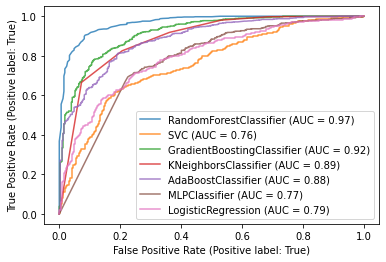

In [26]:
ax=plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax, alpha=0.8)
gbc_disp = RocCurveDisplay.from_estimator(gbc, X_test, y_test, ax=ax, alpha=0.8)
knc_disp = RocCurveDisplay.from_estimator(knc, X_test, y_test, ax=ax, alpha=0.8)
adb_disp = RocCurveDisplay.from_estimator(adb, X_test, y_test, ax=ax, alpha=0.8)
nn_disp = RocCurveDisplay.from_estimator(nn, X_test, y_test, ax=ax, alpha=0.8)
lr_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [27]:
print('Evalution of different models')
print('RandomForest Classifier')
evaluation_of_model(y_test,predrfc)
print('SVC')
evaluation_of_model(y_test,predsvc)
print('KNeighbors Classifier')
evaluation_of_model(y_test,predknc)
print('Gradient Boosting Classifier')
evaluation_of_model(y_test,predgbc)
print('Ada boost')
evaluation_of_model(y_test,predadb)
print('Neural Network')
evaluation_of_model(y_test,prednn)
print('Logistic regression')
evaluation_of_model(y_test,predlr)

Evalution of different models
RandomForest Classifier
RoC AuC Score 0.8698508114785897
Accuracy Score0.9084507042253521
              precision    recall  f1-score   support

       False       0.89      0.78      0.83       329
        True       0.91      0.96      0.94       807

    accuracy                           0.91      1136
   macro avg       0.90      0.87      0.88      1136
weighted avg       0.91      0.91      0.91      1136

Confusion Matrix [[256  73]
 [ 31 776]]
[0.9084507042253521]
SVC
RoC AuC Score 0.5861120213330924
Accuracy Score0.7508802816901409
              precision    recall  f1-score   support

       False       0.78      0.19      0.31       329
        True       0.75      0.98      0.85       807

    accuracy                           0.75      1136
   macro avg       0.76      0.59      0.58      1136
weighted avg       0.76      0.75      0.69      1136

Confusion Matrix [[ 64 265]
 [ 18 789]]
[0.9084507042253521, 0.7508802816901409]
KNeighbors Cla

In [28]:
rfc.fit(df_d_train,y_train)
gbc.fit(df_d_train,y_train)
knc.fit(df_d_train,y_train)
svc.fit(df_d_train,y_train)
adb.fit(df_d_train,y_train)
nn.fit(df_d_train,y_train)
lr.fit(df_d_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [29]:
predrfc = rfc.predict(df_d_test)
predgbc = gbc.predict(df_d_test)
predknc = knc.predict(df_d_test)
predsvc = svc.predict(df_d_test)
predadb = adb.predict(df_d_test)
prednn  = nn.predict(df_d_test)
predlr  = lr.predict(df_d_test)

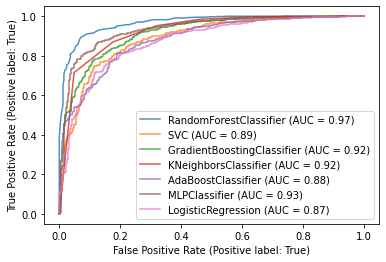

In [30]:
ax=plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, df_d_test, y_test, ax=ax, alpha=0.8)
svc_disp = RocCurveDisplay.from_estimator(svc, df_d_test, y_test, ax=ax, alpha=0.8)
gbc_disp = RocCurveDisplay.from_estimator(gbc, df_d_test, y_test, ax=ax, alpha=0.8)
knc_disp = RocCurveDisplay.from_estimator(knc, df_d_test, y_test, ax=ax, alpha=0.8)
adb_disp = RocCurveDisplay.from_estimator(adb, df_d_test, y_test, ax=ax, alpha=0.8)
nn_disp = RocCurveDisplay.from_estimator(nn, df_d_test, y_test, ax=ax, alpha=0.8)
lr_disp = RocCurveDisplay.from_estimator(lr, df_d_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [31]:
print('Evalution of different models after Standard Scalar')
print('RandomForest Classifier')
evaluation_of_model(y_test,predrfc)
print('SVC')
evaluation_of_model(y_test,predsvc)
print('KNeighbors Classifier')
evaluation_of_model(y_test,predknc)
print('Gradient Boosting Classifier')
evaluation_of_model(y_test,predgbc)
print('Ada boost')
evaluation_of_model(y_test,predadb)
print('Neural Network')
evaluation_of_model(y_test,prednn)
print('Logistic regression')
evaluation_of_model(y_test,predlr)

Evalution of different models after Standard Scalar
RandomForest Classifier
RoC AuC Score 0.8704120104104286
Accuracy Score0.9066901408450704
              precision    recall  f1-score   support

       False       0.88      0.78      0.83       329
        True       0.92      0.96      0.94       807

    accuracy                           0.91      1136
   macro avg       0.90      0.87      0.88      1136
weighted avg       0.91      0.91      0.91      1136

Confusion Matrix [[258  71]
 [ 35 772]]
[0.9084507042253521, 0.7508802816901409, 0.8371478873239436, 0.8565140845070423, 0.8248239436619719, 0.7121478873239436, 0.7526408450704225, 0.9066901408450704]
SVC
RoC AuC Score 0.7501760808729091
Accuracy Score0.829225352112676
              precision    recall  f1-score   support

       False       0.79      0.56      0.66       329
        True       0.84      0.94      0.89       807

    accuracy                           0.83      1136
   macro avg       0.81      0.75      0.77

In [32]:
rfc.fit(df_d_train_mm,y_train)
gbc.fit(df_d_train_mm,y_train)
knc.fit(df_d_train_mm,y_train)
svc.fit(df_d_train_mm,y_train)
adb.fit(df_d_train_mm,y_train)
nn.fit(df_d_train_mm,y_train)
lr.fit(df_d_train_mm,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [33]:
predrfc = rfc.predict(df_d_test_mm)
predgbc = gbc.predict(df_d_test_mm)
predknc = knc.predict(df_d_test_mm)
predsvc = svc.predict(df_d_test_mm)
predadb = adb.predict(df_d_test_mm)
prednn = nn.predict(df_d_test_mm)
predlr = lr.predict(df_d_test_mm)

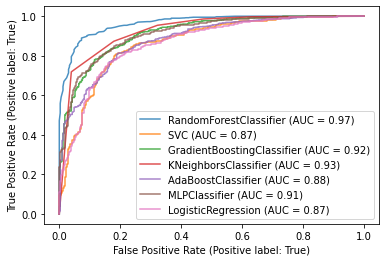

In [34]:
ax=plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, df_d_test_mm, y_test, ax=ax, alpha=0.8)
svc_disp = RocCurveDisplay.from_estimator(svc, df_d_test_mm, y_test, ax=ax, alpha=0.8)
gbc_disp = RocCurveDisplay.from_estimator(gbc, df_d_test_mm, y_test, ax=ax, alpha=0.8)
knc_disp = RocCurveDisplay.from_estimator(knc, df_d_test_mm, y_test, ax=ax, alpha=0.8)
adb_disp = RocCurveDisplay.from_estimator(adb, df_d_test_mm, y_test, ax=ax, alpha=0.8)
nn_disp = RocCurveDisplay.from_estimator(nn, df_d_test_mm, y_test, ax=ax, alpha=0.8)
lr_disp = RocCurveDisplay.from_estimator(lr, df_d_test_mm, y_test, ax=ax, alpha=0.8)
plt.show()

In [35]:
print('Evalution of different models after MinMax Scalar')
print('RandomForest Classifier')
evaluation_of_model(y_test,predrfc)
print('SVC')
evaluation_of_model(y_test,predsvc)
print('KNeighbors Classifier')
evaluation_of_model(y_test,predknc)
print('Gradient Boosting Classifier')
evaluation_of_model(y_test,predgbc)
print('Ada boost')
evaluation_of_model(y_test,predadb)
print('Neural Network')
evaluation_of_model(y_test,prednn)
print('Logistic regression')
evaluation_of_model(y_test,predlr)

Evalution of different models after MinMax Scalar
RandomForest Classifier
RoC AuC Score 0.8661333393596305
Accuracy Score0.903169014084507
              precision    recall  f1-score   support

       False       0.87      0.78      0.82       329
        True       0.91      0.95      0.93       807

    accuracy                           0.90      1136
   macro avg       0.89      0.87      0.88      1136
weighted avg       0.90      0.90      0.90      1136

Confusion Matrix [[256  73]
 [ 37 770]]
[0.9084507042253521, 0.7508802816901409, 0.8371478873239436, 0.8565140845070423, 0.8248239436619719, 0.7121478873239436, 0.7526408450704225, 0.9066901408450704, 0.829225352112676, 0.8732394366197183, 0.8573943661971831, 0.8248239436619719, 0.8661971830985915, 0.8309859154929577, 0.903169014084507]
SVC
RoC AuC Score 0.7328391769584525
Accuracy Score0.8186619718309859
              precision    recall  f1-score   support

       False       0.77      0.53      0.63       329
        True    

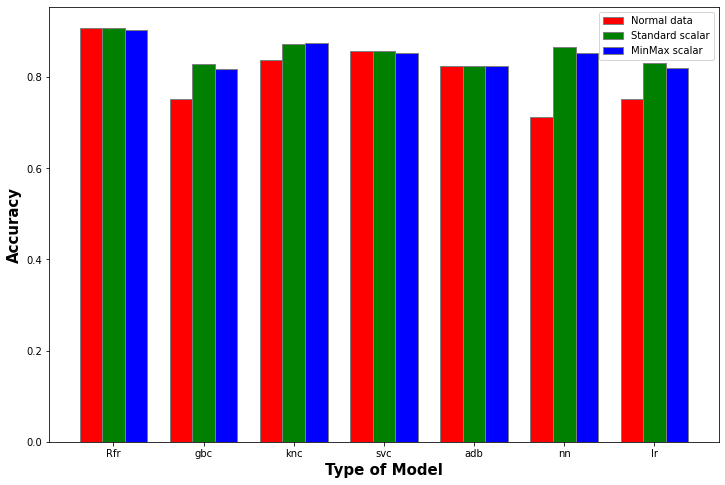

In [36]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
Normal_data = accuracy[0:7]
Standard_scalar = accuracy[7:14]
minmax_scalar= accuracy[14:21]

 

br1 = np.arange(len(Normal_data ))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 

plt.bar(br1,Normal_data , color ='r', width = barWidth,
        edgecolor ='grey', label ='Normal data')
plt.bar(br2,Standard_scalar , color ='g', width = barWidth,
        edgecolor ='grey', label ='Standard scalar')
plt.bar(br3,minmax_scalar , color ='b', width = barWidth,
        edgecolor ='grey', label ='MinMax scalar')
 

plt.xlabel('Type of Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Normal_data))],
        ['Rfr', 'gbc', 'knc', 'svc', 'adb', 'nn' ,'lr'])
 
plt.legend()
plt.show()